In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [4]:
#Read the data
startups = pd.read_csv("50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


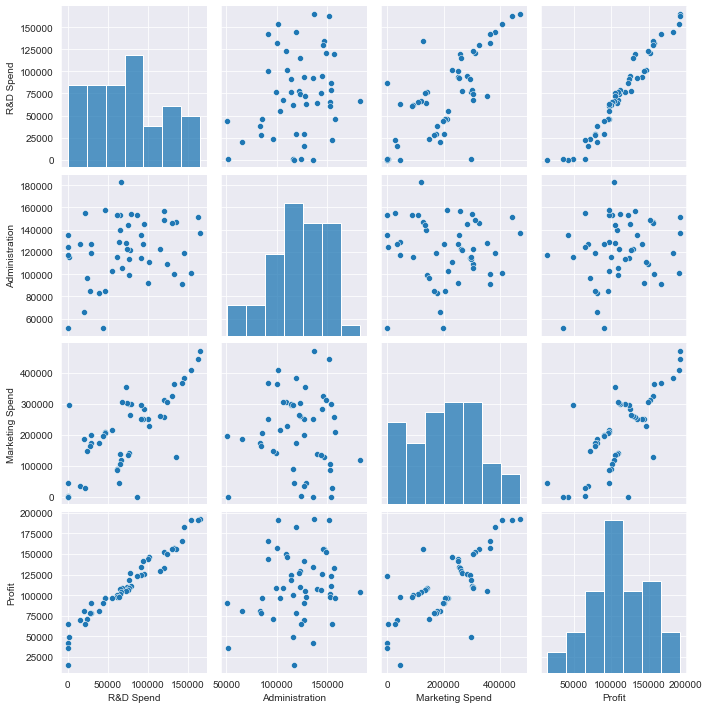

In [8]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [9]:
startups=startups.rename({'R&D Spend':'rd', 'Administration':'ad', 'Marketing Spend': 'market'},axis=1)

In [10]:
startups

,rd,ad,market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~rd+ad+market',data=startups).fit()

In [12]:
model.rsquared

0.9507459940683246

In [13]:
model.params

Intercept    50122.192990
rd               0.805715
ad              -0.026816
market           0.027228
dtype: float64

In [14]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
rd           17.846374
ad           -0.525507
market        1.655077
dtype: float64 
 Intercept    1.057379e-09
rd           2.634968e-22
ad           6.017551e-01
market       1.047168e-01
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [16]:
p_ad=smf.ols('Profit~ad',data = startups).fit()  
#t and p-Values
print(p_ad.tvalues, '\n', p_ad.pvalues)  

Intercept    3.040044
ad           1.419493
dtype: float64 
 Intercept    0.003824
ad           0.162217
dtype: float64


In [17]:
p_market=smf.ols('Profit~market',data = startups).fit()  
#t and p-Values
print(p_market.tvalues, '\n', p_market.pvalues)

Intercept    7.808356
market       7.802657
dtype: float64 
 Intercept    4.294735e-10
market       4.381073e-10
dtype: float64


In [18]:
p_admarket=smf.ols('Profit~ad+market',data = startups).fit()  
print(p_admarket.tvalues, '\n', p_admarket.pvalues) 

Intercept    1.142741
ad           2.467779
market       8.281039
dtype: float64 
 Intercept    2.589341e-01
ad           1.729198e-02
market       9.727245e-11
dtype: float64


In [19]:
rsq_rd=smf.ols("rd~ad+market",data=startups).fit().rsquared
vif_rd=1/(1-rsq_rd)

rsq_ad=smf.ols("ad~rd+market",data=startups).fit().rsquared
vif_ad=1/(1-rsq_ad)

rsq_m=smf.ols("market~rd+ad",data=startups).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['rd','ad','market'],'Vif':[vif_rd,vif_ad,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,rd,2.468903
1,ad,1.175091
2,market,2.326773


C:\Users\vinay\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


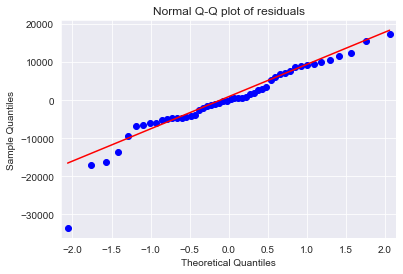

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [22]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

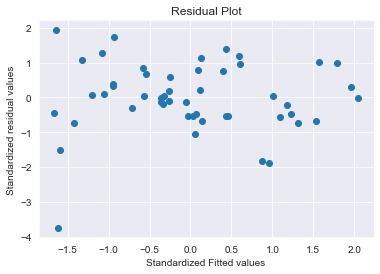

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

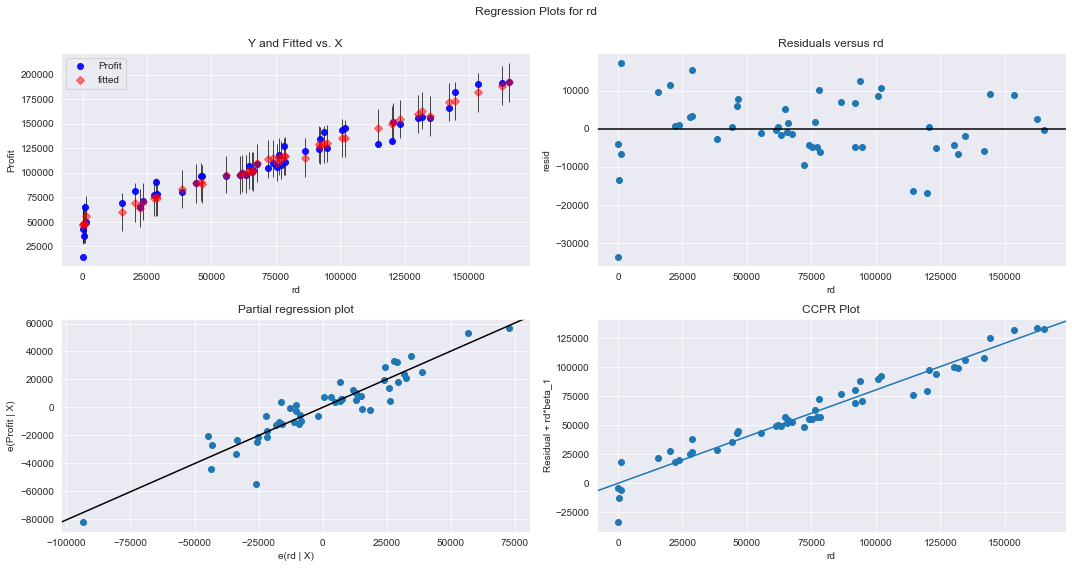

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rd", fig=fig)
plt.show()

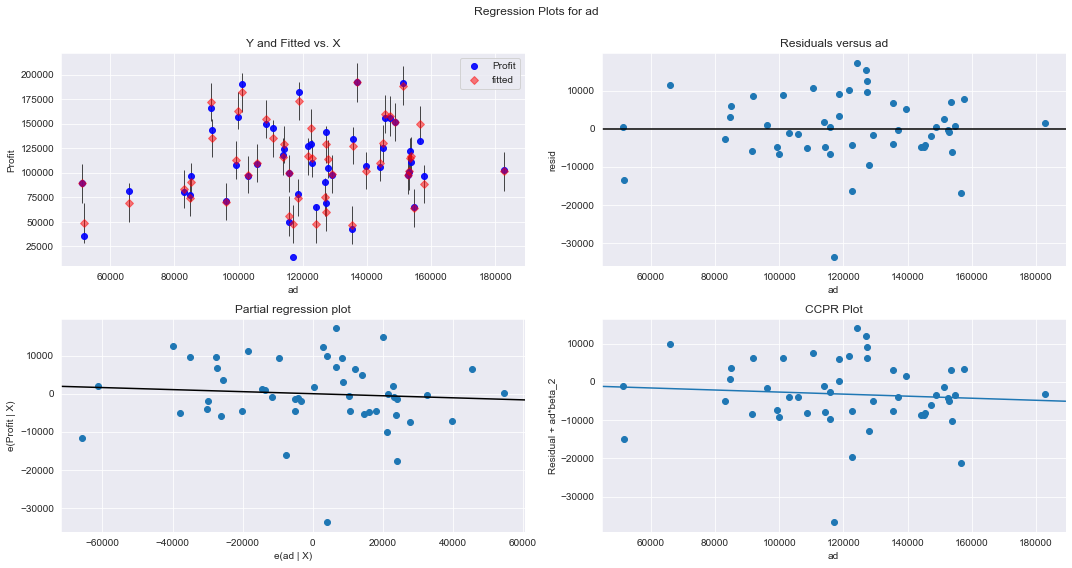

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ad", fig=fig)
plt.show()

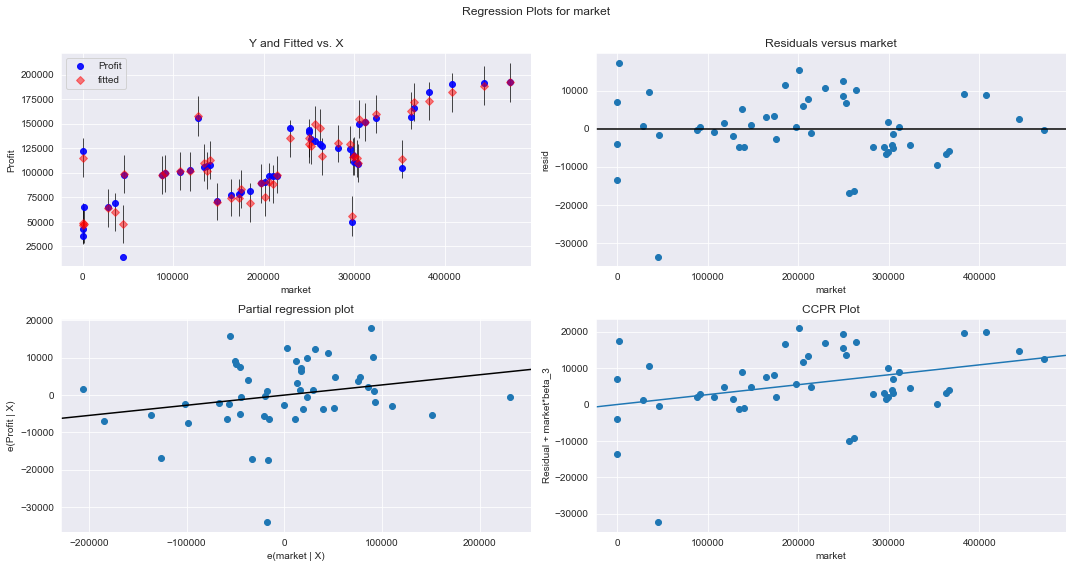

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "market", fig=fig)
plt.show()

In [29]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

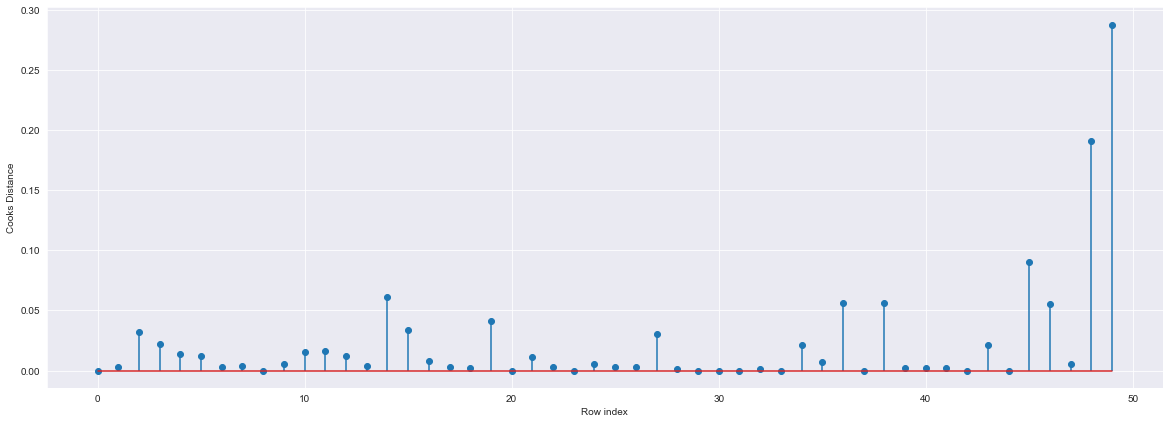

In [32]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(startups)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

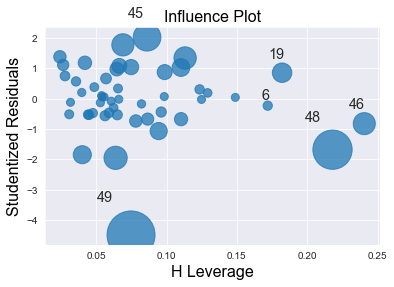

In [34]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [35]:
k = startups.shape[1]
n = startups.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [38]:
startups[startups.index.isin([49])]

,rd,ad,market,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [40]:
startups_new=pd.read_csv("50_Startups.csv")

In [41]:
startups1=startups_new.drop(startups_new.index[[49]],axis=0).reset_index()

In [42]:
startups1=startups1.drop(['index'],axis=1)

In [43]:
startups1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [48]:
startups1=startups1.rename({'R&D Spend':'rd', 'Administration':'ad', 'Marketing Spend': 'market'},axis=1)
startups1

,rd,ad,market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [47]:
final_startups= smf.ols('Profit~rd+ad+market',data = startups1).fit()

In [49]:
(final_startups.rsquared,final_startups.aic)

(0.9613162435129847, 1020.5652974526367)

In [51]:
startups1.mean()

C:\Users\vinay\AppData\Local\Temp/ipykernel_10572/3813086950.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  startups1.mean()


rd         75226.138367
ad        121433.636327
market    214409.833265
Profit    113998.991020
dtype: float64

In [52]:
new_startups=pd.DataFrame({'rd':75000,"ad":120000,"market":210000},index=[1])

In [53]:
final_startups.predict(new_startups) 

1    113742.476863
dtype: float64

In [55]:
final_startups.predict(new_startups.iloc[0:5,])

1    113742.476863
dtype: float64

In [56]:
pred_y=final_startups.predict(startups1)

In [57]:
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [63]:
S2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_startups.rsquared]}
table=pd.DataFrame(S2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
